In [16]:
# Define image path
import os
from PIL import Image
IMAGE_PATH = "C://Cropped_images//Cropped_images1"

# Scan the directory and process files
with os.scandir(IMAGE_PATH) as entries:
    file_list = [entry.name for entry in entries if entry.is_file()]

for file in file_list:
    img_path = os.path.join(IMAGE_PATH, file)
    with Image.open(img_path) as img:
        dimensions = img.size  # Get image dimensions (width, height)
        print(f"Image: {file}, Dimensions: {dimensions}")

Image: -1.jpg, Dimensions: (200, 200)
Image: -10.jpg, Dimensions: (200, 200)
Image: -11.jpg, Dimensions: (200, 200)
Image: -12.jpg, Dimensions: (200, 200)
Image: -13.jpg, Dimensions: (200, 200)
Image: -14.jpg, Dimensions: (200, 200)
Image: -15.jpg, Dimensions: (200, 200)
Image: -16.jpg, Dimensions: (200, 200)
Image: -17.jpg, Dimensions: (200, 200)
Image: -18.jpg, Dimensions: (200, 200)
Image: -19.jpg, Dimensions: (200, 200)
Image: -2.jpg, Dimensions: (200, 200)
Image: -20.jpg, Dimensions: (200, 200)
Image: -21.jpg, Dimensions: (200, 200)
Image: -22.jpg, Dimensions: (200, 200)
Image: -23.jpg, Dimensions: (200, 200)
Image: -24.jpg, Dimensions: (200, 200)
Image: -25.jpg, Dimensions: (200, 200)
Image: -26.jpg, Dimensions: (200, 200)
Image: -27.jpg, Dimensions: (200, 200)
Image: -28.jpg, Dimensions: (200, 200)
Image: -29.jpg, Dimensions: (200, 200)
Image: -3.jpg, Dimensions: (200, 200)
Image: -30.jpg, Dimensions: (200, 200)
Image: -31.jpg, Dimensions: (200, 200)
Image: -32.jpg, Dimensions: 

In [17]:
dimensions

(200, 200)

In [18]:
import numpy as np
# Define image path
IMAGE_PATH = "C://Cropped_images//Cropped_images1"

# Initialize lists
image_list = []
label_list = []

# Scan the directory and process files
with os.scandir(IMAGE_PATH) as entries:
    file_list = [entry.name for entry in entries if entry.is_file()]

for file in file_list:
    # Determine label based on filename
    label = 0 if '-' in file else 1
    
    # Load and process image
    img_path = os.path.join(IMAGE_PATH, file)
    with Image.open(img_path) as img:
        img = img.convert('L')  # Convert to grayscale
        img_array = np.array(img)  # Convert image to numpy array

    image_list.append(img_array)
    label_list.append(label)

# Convert lists to numpy arrays
X_images = np.array(image_list)
y_labels = np.array(label_list)

# Output the shapes and first few entries for verification
print(X_images.shape)
print(y_labels[:70])  # Print the first 20 labels to verify

(136, 200, 200)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [10]:
X_images

array([], dtype=float64)

In [64]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_images, y_labels, test_size=0.2, random_state=42, stratify=y_labels)

# Output the shapes and lengths for verification
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (108, 200, 200)
y_train shape: (108,)
X_test shape: (28, 200, 200)
y_test shape: (28,)


In [65]:
# Reshape data to add a channel dimension (grayscale)
X_train = X_train.reshape(X_train.shape[0], 200, 200, 1)
X_test = X_test.reshape(X_test.shape[0], 200, 200, 1)

In [132]:
# Building the CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Convolutional Layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Convolutional Layer 3
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Flattening the layers
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
# Fully connected layer 2 (Output layer)
model.add(Dense(1, activation='sigmoid'))  # Binary classification (COVID or not)

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d_71 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_66 (Ba  (None, 99, 99, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_107 (Dropout)       (None, 99, 99, 32)        0         
                                                                 
 conv2d_74 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_72 (MaxPooli  (None, 48, 48, 64)      

In [133]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/50
7/7 [==============================] - 6s 538ms/step - loss: 5.5481 - accuracy: 0.5185 - val_loss: 7.5002 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 3s 499ms/step - loss: 8.0965 - accuracy: 0.5185 - val_loss: 17.4618 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 3s 496ms/step - loss: 4.1805 - accuracy: 0.5093 - val_loss: 22.6980 - val_accuracy: 0.5000
Epoch 4/50
7/7 [==============================] - 4s 504ms/step - loss: 5.8126 - accuracy: 0.5000 - val_loss: 38.9709 - val_accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 4s 505ms/step - loss: 5.9799 - accuracy: 0.6019 - val_loss: 14.2311 - val_accuracy: 0.5000
Epoch 6/50
7/7 [==============================] - 4s 508ms/step - loss: 3.9676 - accuracy: 0.5648 - val_loss: 0.6853 - val_accuracy: 0.7143
Epoch 7/50
7/7 [==============================] - 4s 503ms/step - loss: 3.8252 - accuracy: 0.5185 - val_loss: 2.4663 - val_accuracy: 0.5000
Epoch 8/50
7/7 [

In [134]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 128ms/step - loss: 1.7472 - accuracy: 0.6071
Test Accuracy: 60.71%


In [135]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
# Classification report
predictions = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions
print(classification_report(y_test, predictions))

1/1 [==============================] - 0s 230ms/step
              precision    recall  f1-score   support

           0       0.80      0.29      0.42        14
           1       0.57      0.93      0.70        14

    accuracy                           0.61        28
   macro avg       0.68      0.61      0.56        28
weighted avg       0.68      0.61      0.56        28



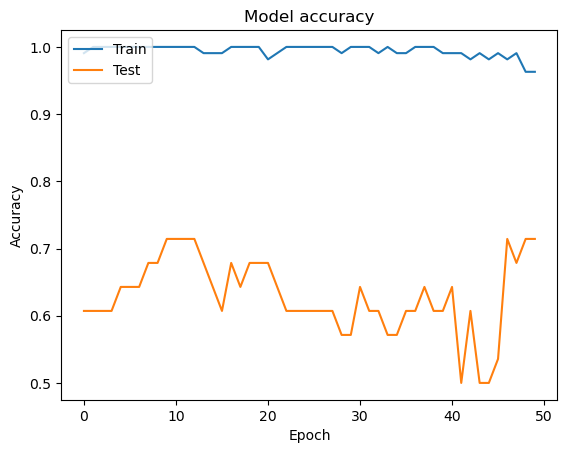

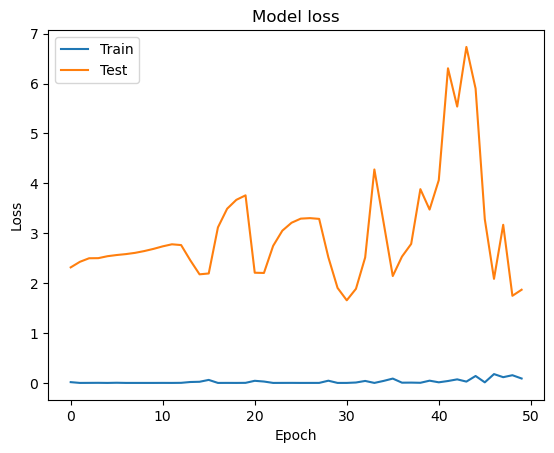

In [94]:
from matplotlib import pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()